## PÉNDULO DOBLE CON RESORTES

\
Jorge Luis David Mesa



In [ ]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

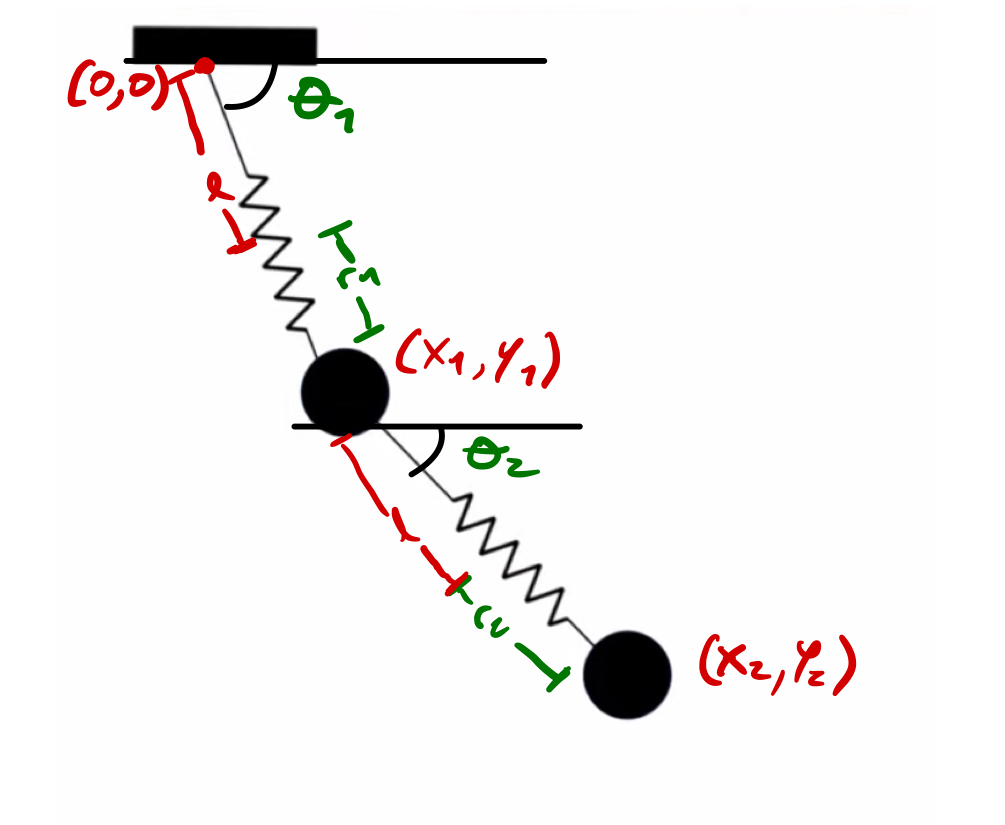

Se pone el origen de coordenadas en el punto fijo del péndulo. \
$l$ es la longitud natural de cada resorte \
$r_{1}$: Enlongación del resorte 1\
$r_{2}$: Enlongación del resorte 2


Definiremos todas las variables necesarias:
\
\
Tiempo $t$
\
Masa de los péndulos $m$
\
Aceleración de la gravedad $g$
\
Constante elástica para los dos resortes $k$


A través de la imagen se tiene que las coordenadas cartesianas de las masas vienen dado por las siguientes expresiones:

$$x_{1} = (l+r_{1})\cos{\theta_{1}} \:\:\:\:,\:\:\:\: y_{1} = -(l+r_{1})\sin{\theta_{1}}$$

$$x_{2} = x_{1} + (l+r_{2})\cos{\theta_{2}} \:\:\:\:,\:\:\:\: y_{2} = y_{1} -(l+r_{2})\sin{\theta_{2}}$$
\
Definieremos las cuatro variables libres: $θ_{1}$, $θ_{2}$, $r_{1}$, $r_{2}$ (r1, r2 representa la enlongación de cada resorte).

Se hará para el proceso analitico, $l=1$ por simplicidad.

In [ ]:
t, m, g, k = smp.symbols('t m g k') #Variables

In [ ]:
the1, the2, r1, r2 = smp.symbols(r'\theta_1, \theta_2, r_1, r_2', cls=smp.Function)


the1 = the1(t)                 #Variable
the1_d = smp.diff(the1, t)     #Primera Derivada
the1_dd = smp.diff(the1_d, t)  #Segunda Derivada

the2 = the2(t)                           #Variable
the2_d = smp.diff(the2, t)               #Primera Derivada     
the2_dd = smp.diff(smp.diff(the2, t), t) #Segunda Derivada

r1 = r1(t)                            #Variable
r1_d = smp.diff(r1, t)                #Primera Derivada
r1_dd = smp.diff(smp.diff(r1, t), t)  #Segunda Derivada

r2 = r2(t)                            #Variable
r2_d = smp.diff(r2, t)                #Primera Derivada
r2_dd = smp.diff(smp.diff(r2, t), t)  #Segunda Derivada

Definamos las coordenadas cartesianas en función de las variables libres:

In [ ]:
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1= x1(the1, r1)
y1= y1(the1, r1)
x2= x2(the1, r1, the2, r2)
y2= y2(the1, r1, the2, r2)

In [ ]:
x1 = (1+r1)*smp.cos(the1)
y1 = -(1+r1)*smp.sin(the1)
x2 = (1+r1)*smp.cos(the1) + (1+r2)*smp.cos(the2)
y2 = -(1+r1)*smp.sin(the1)-(1+r2)*smp.sin(the2)

Como energía cinética y potencial del sistema tenemos respectivamente:
\
$$T= \frac{1}{2} m (\dot{x_{1}}+\dot{y_{1}}) + \frac{1}{2}m(\dot{x_{2}}+\dot{y_{2}}) \;\;\;\;\;\;\ V= mgy_{1} + mgy_{2}+ \frac{1}{2} kr_{1}^2 + \frac{1}{2} kr_{2}^2$$
\
Así nuestro respectivo Lagrangiano es:
$$L=T-V$$
$$L=\frac{1}{2} m (\dot{x_{1}}+\dot{y_{1}}) + \frac{1}{2}m(\dot{x_{2}}+\dot{y_{2}})-[mgy_{1} + mgy_{2}+ \frac{1}{2} kr_{1}^2 + \frac{1}{2} kr_{2}^2]$$

In [ ]:
T = 1/2 * m * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + \
               smp.diff(x2, t)**2 + + smp.diff(y2, t)**2)
V = m*g*y1 + m*g*y2 + 1/2 * k * r1**2 + 1/2 * k * r2**2
L = T-V
L

-g*m*((-r_1(t) - 1)*sin(\theta_1(t)) - (r_2(t) + 1)*sin(\theta_2(t))) - g*m*(-r_1(t) - 1)*sin(\theta_1(t)) - 0.5*k*r_1(t)**2 - 0.5*k*r_2(t)**2 + 0.5*m*(((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t))**2 + ((-r_1(t) - 1)*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (-r_2(t) - 1)*cos(\theta_2(t))*Derivative(\theta_2(t), t) - sin(\theta_1(t))*Derivative(r_1(t), t) - sin(\theta_2(t))*Derivative(r_2(t), t))**2 + (-(r_1(t) + 1)*sin(\theta_1(t))*Derivative(\theta_1(t), t) - (r_2(t) + 1)*sin(\theta_2(t))*Derivative(\theta_2(t), t) + cos(\theta_1(t))*Derivative(r_1(t), t) + cos(\theta_2(t))*Derivative(r_2(t), t))**2)

Luego realizaremos cada una de las respectivas ecuaciones de movimiento haciendo uso de las ecuaciones de Euler-Lagrange:
$$\frac{dL}{dq}-\frac{d}{dt}\frac{dL}{d\dot{q}}=0$$
Donde $q$ es cada una de las variables libres (coordenadas generalizadas)

In [ ]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)    #  Ecuación de movimiento para theta_1 usando Euler-Lagrange
LE1 = LE1.simplify()

In [ ]:
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)   #  Ecuación de movimiento para theta_2 usando Euler-Lagrange
LE2 = LE2.simplify()

In [ ]:
LE3 = smp.diff(L, r1) - smp.diff(smp.diff(L, r1_d), t)       #  Ecuación de movimiento para r_1 usando Euler-Lagrange
LE3 = LE3.simplify()

In [ ]:
LE4 = smp.diff(L, r2) - smp.diff(smp.diff(L, r2_d), t)     #  Ecuación de movimiento para r_2 usando Euler-Lagrange
LE4 = LE4.simplify()

Para convertir nuestro sistema de segundo orden en uno de primer orden, definiremos nuestras derivadas como:
$$w_{1}=\frac{d\theta_{1}}{dt}\;\;,w_{2}=\frac{d\theta_{2}}{dt}\;\;,v_{1}=\frac{dr_{1}}{dt}\;\;,v_{2}=\frac{dr_{2}}{dt}  $$

In [ ]:

sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, r1_dd, r2_dd),    #Se despejan las segundas derivadas en cada ecuación de movimiento
                simplify=False, rational=False)
sols

Definiremos nuestras diferentes derivadas como funciones:

In [ ]:
dw1dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dw2dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dv1dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r1_dd])
dr1dt_f = smp.lambdify(r1_d, r1_d)

dv2dt_f = smp.lambdify((m, k ,g, the1, the2, r1, r2, the1_d, the2_d, r1_d, r2_d), sols[r2_dd])
dr2dt_f = smp.lambdify(r2_d, r2_d)

Definiremos nuestro sistema de ecuaciones, asignando cada una de las variables necesarias para cada función:

In [ ]:
def dSdt(S, t):
    the1, w1, the2, w2, r1, v1, r2, v2 = S
    return [
        dthe1dt_f(w1),
        dw1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dthe2dt_f(w2),
        dw2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr1dt_f(v1),
        dv1dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
        dr2dt_f(v2),
        dv2dt_f(m,k,g,the1,the2,r1,r2,w1,w2,v1,v2),
    ]

Asignación de valores a las variables:

In [ ]:
t = np.linspace(0, 20, 1000)
g = 9.81
m=1
k=10
ans = odeint(dSdt, y0=[np.pi/2,0,(3/2)*np.pi/2,0,0,5,0,5], t=t)

Gráficas de cada coordenada generalizada respecto al tiempo

Text(0, 0.5, '$r_2(t)$')

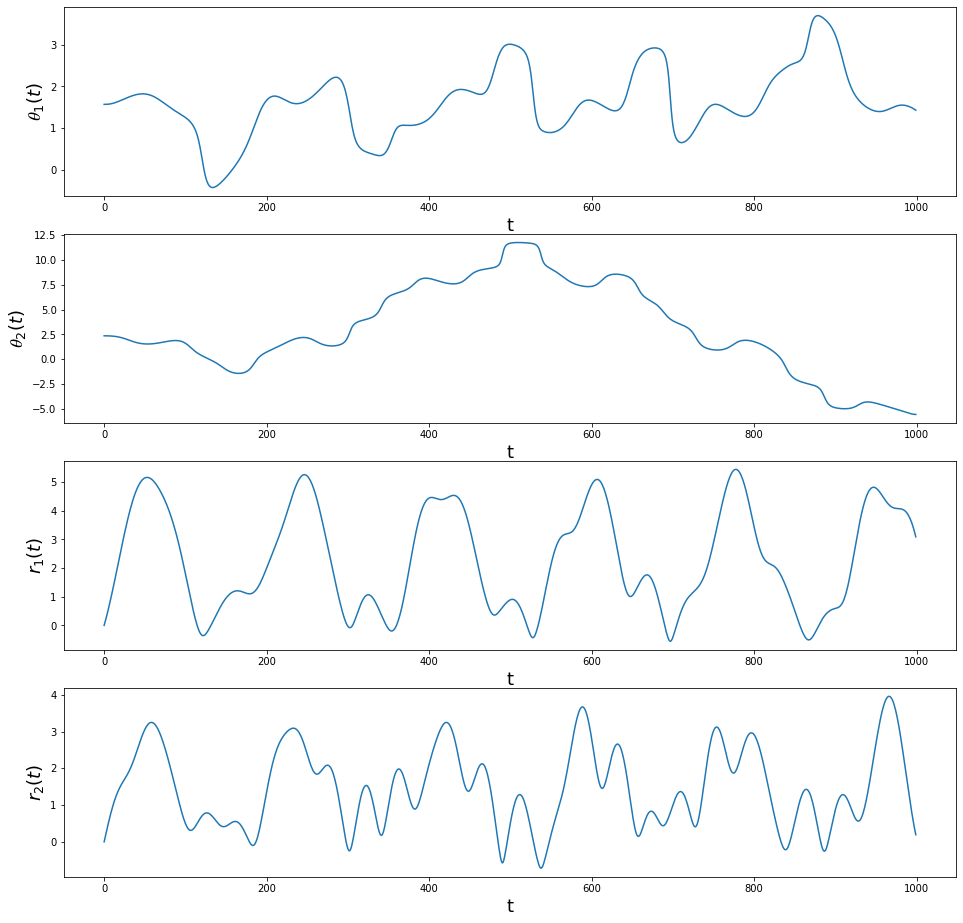

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(4, 1, 1)
plt.plot(ans.T[0])
plt.xlabel('t', fontsize = 18)
plt.ylabel('$𝜃_1(t)$', fontsize = 18)

plt.subplot(4, 1, 2)
plt.plot(ans.T[2])
plt.xlabel('t', fontsize = 18)
plt.ylabel('$𝜃_2(t)$', fontsize = 18)

plt.subplot(4, 1, 3)
plt.plot(ans.T[4])
plt.xlabel('t', fontsize = 18)
plt.ylabel('$r_1(t)$', fontsize = 18)

plt.subplot(4, 1, 4)
plt.plot(ans.T[6])
plt.xlabel('t', fontsize = 18)
plt.ylabel('$r_2(t)$', fontsize = 18)

Usaremos las coordenadas cartesianas expuestas anteriormente para cada masa:

In [ ]:
def get_x1y1x2y2(the1, the2, r1, r2):
    return ((1+r1)*np.cos(the1),
            -(1+r1)*np.sin(the1),
            (1+r1)*np.cos(the1) + (1+r2)*np.cos(the2),
            -(1+r1)*np.sin(the1)-(1+r2)*np.sin(the2)
    )

In [ ]:
x1, y1, x2, y2 = get_x1y1x2y2(ans.T[0], ans.T[2], ans.T[4], ans.T[6])

Text(0, 0.5, '$y_2(t)$')

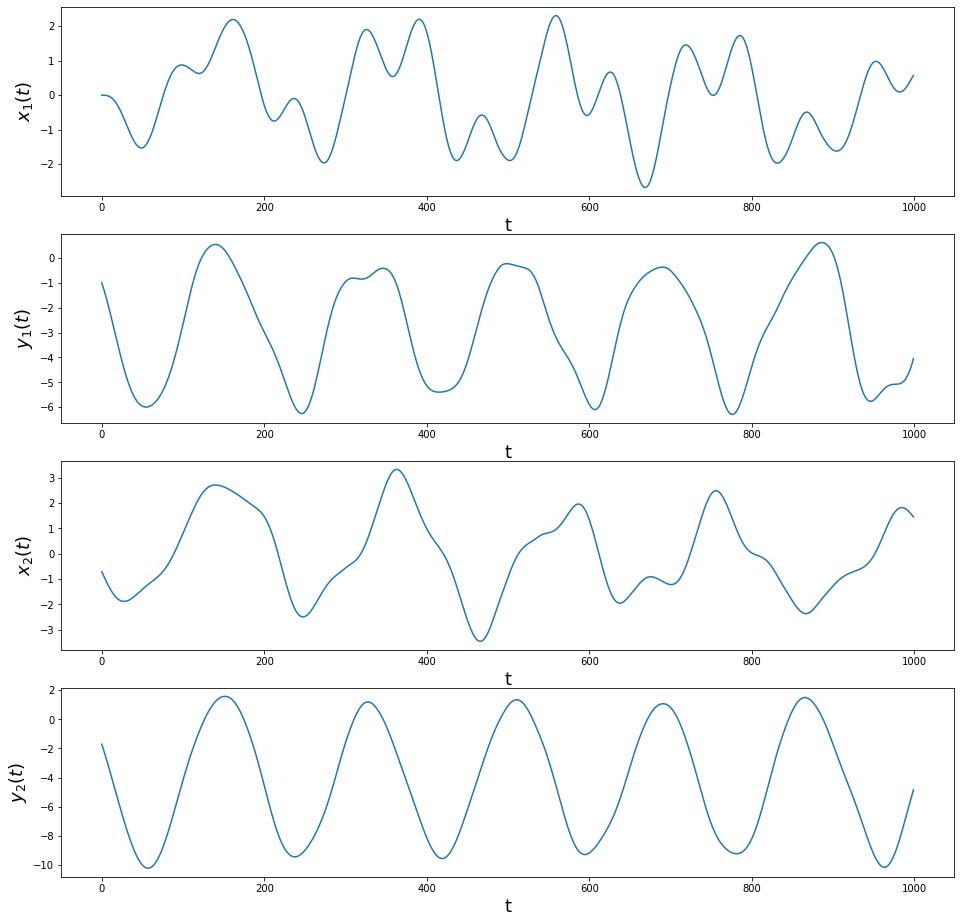

In [ ]:
plt.figure(figsize=(16,16))


plt.subplot(4, 1, 1)
plt.plot(x1)
plt.xlabel('t', fontsize = 18)
plt.ylabel('$x_1(t)$', fontsize = 18)

plt.subplot(4, 1, 2)
plt.plot(y1)
plt.xlabel('t', fontsize = 18)
plt.ylabel('$y_1(t)$', fontsize = 18)

plt.subplot(4, 1, 3)
plt.plot(x2)
plt.xlabel('t', fontsize = 18)
plt.ylabel('$x_2(t)$', fontsize = 18)

plt.subplot(4, 1, 4)
plt.plot(y2)
plt.xlabel('t', fontsize = 18)
plt.ylabel('$y_2(t)$', fontsize = 18)

Animación del péndulo doble con resotes $\textbf{(El gif quedara guardado en los archivos del notebook para su visualización dinámica)}$

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10,10)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)